In [1]:
import numpy
import pandas as pd
from pandas import read_csv, DataFrame, Series, Grouper, concat
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt, log, exp
from scipy.stats import boxcox
from pandas.plotting import lag_plot
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm

In [3]:
series = read_csv('/content/AirPassengers.csv', header=0, index_col=0, parse_dates=True)
print(series.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [4]:
print(series.describe())

       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


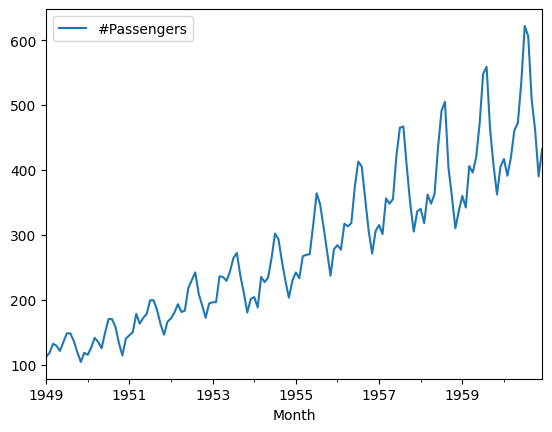

In [7]:
series.plot()
pyplot.show()

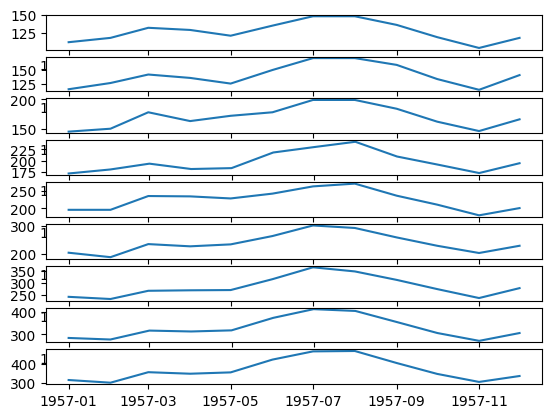

In [8]:
groups = series['1949':'1957'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure()
i=1
n_groups = len(groups)
for name, group in groups:
  pyplot.subplot((n_groups*100)+ 10+i)
  i += 1
  pyplot.plot(group)
pyplot.show()

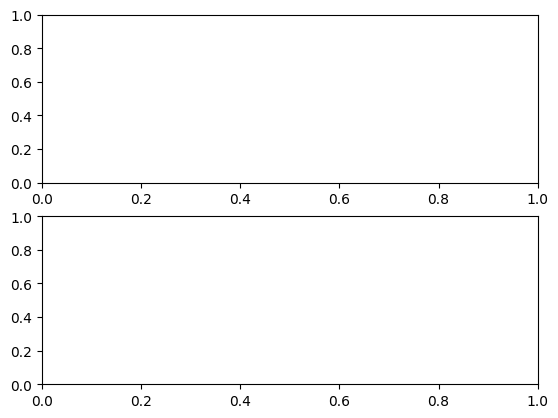

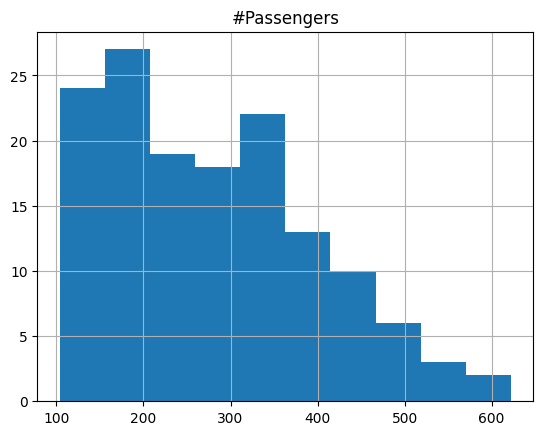

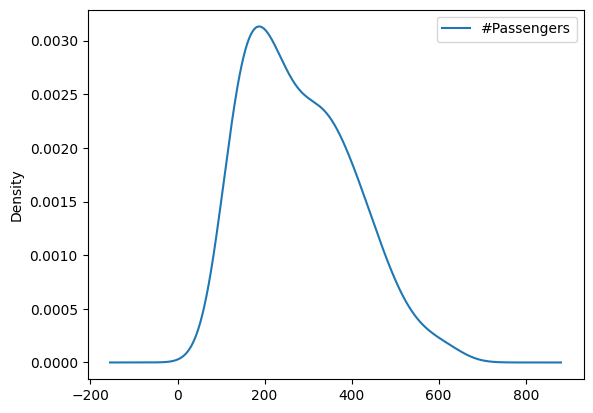

In [9]:
pyplot.figure(1)
pyplot.subplot(211)
pyplot.subplot(212)
series.hist()
series.plot(kind='kde')
pyplot.show()

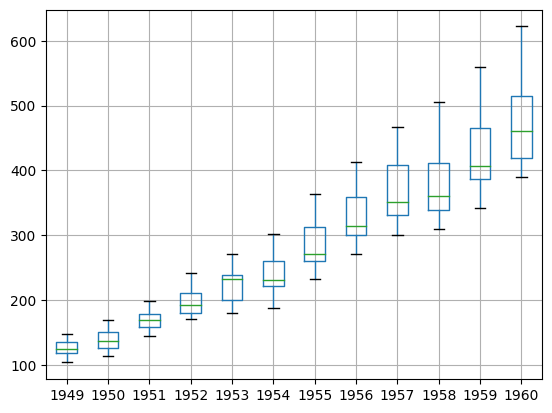

In [10]:
groups = series['1949': '1960'].groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
  years[name.year] = group.values.ravel()
years.boxplot()
pyplot.show()

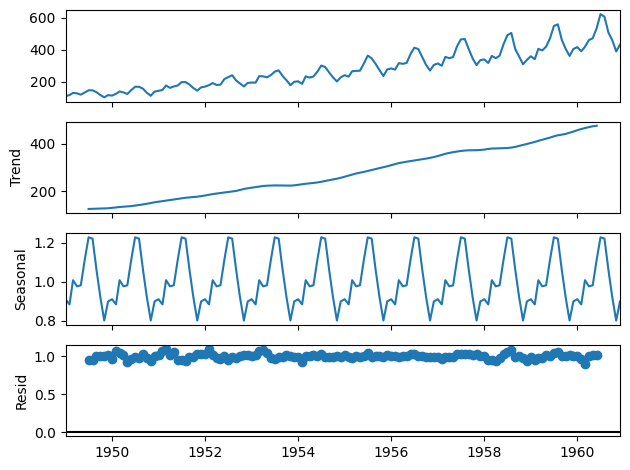

In [11]:
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

In [12]:
def test_stationarity(timeseries):
  #Determine rolling statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()

  #plot rolling statistics
  plt.plot(timeseries, color='blue', label='Original')
  plt.plot(movingAverage, color='red', label='Rolling Mean')
  plt.plot(movingSTD, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  #perform dickey-fuller test
  print('Results of Dickey-Fuller Test:')
  airpass_test = adfuller(timeseries['Passengers'], autolag='AIC')
  dfoutput = pd.series(airpass_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, value in airpass_test[4].items():
    dfoutput['Critical Value (%s)' % key] = value
  print(dfoutput)

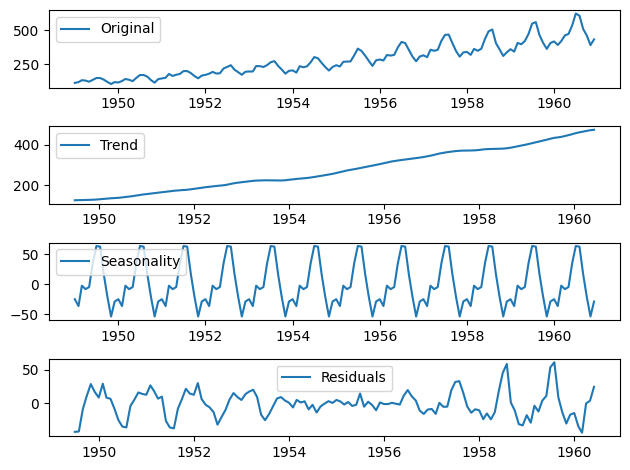

In [13]:
import matplotlib.pyplot as plt
decomp=seasonal_decompose(series)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(series,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [14]:
decomp_data=residual
decomp_data=decomp_data.dropna()
print(decomp_data.head)

<bound method NDFrame.head of Month
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
                ...    
1960-02-01   -34.186869
1960-03-01   -43.967172
1960-04-01    -0.296717
1960-05-01     3.756313
1960-06-01    24.555556
Name: resid, Length: 132, dtype: float64>


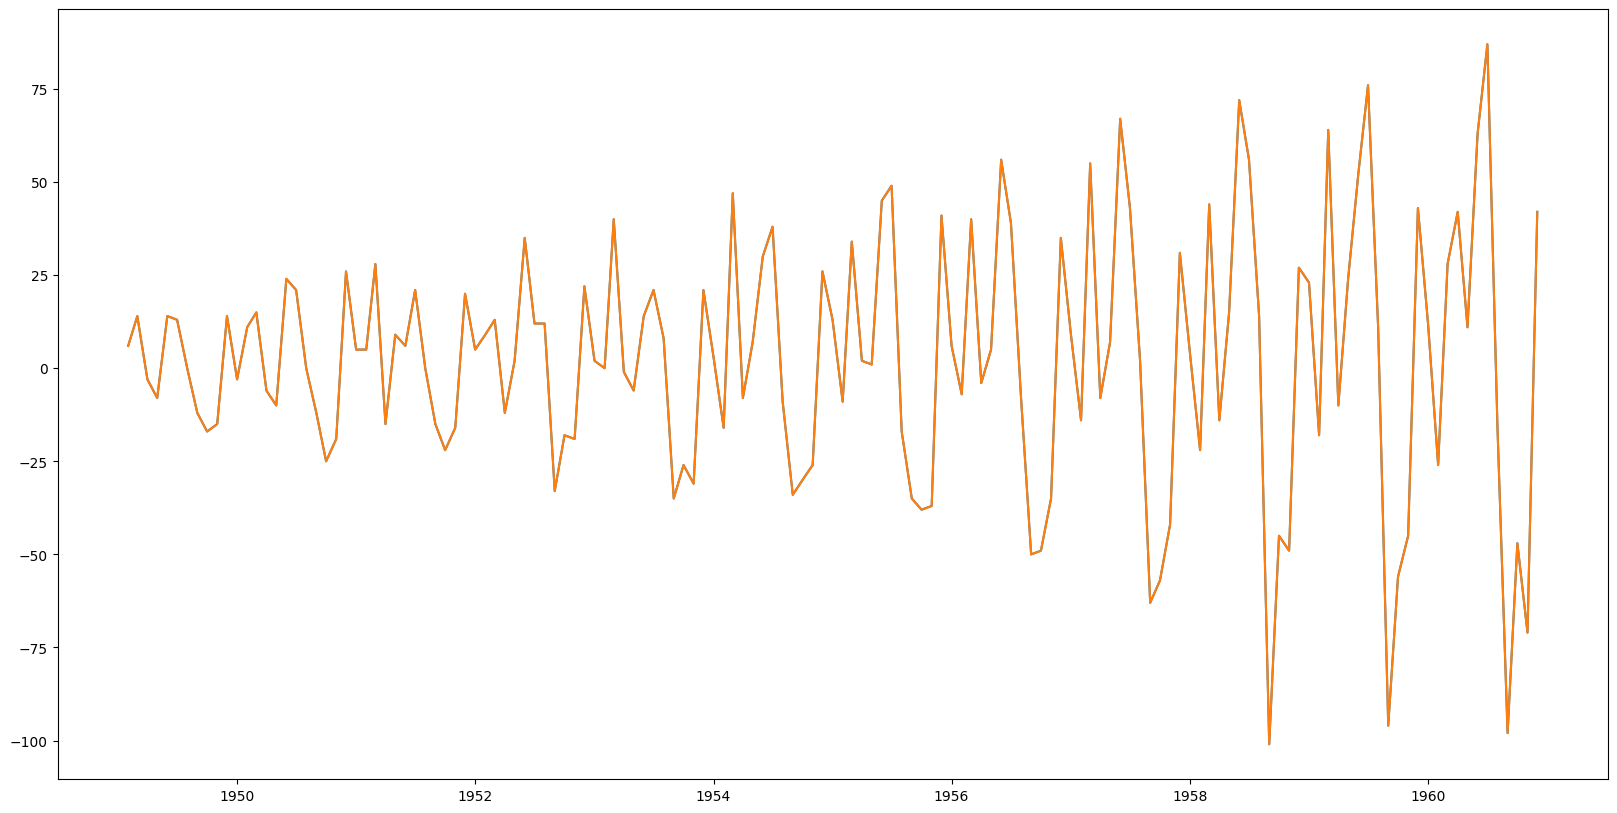

In [15]:
plt.figure(figsize=(20,10))
data_shift=series-series.shift()
plt.plot(data_shift)
data_shift.dropna(inplace=True)
plt.plot(data_shift)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting ARIMA Model


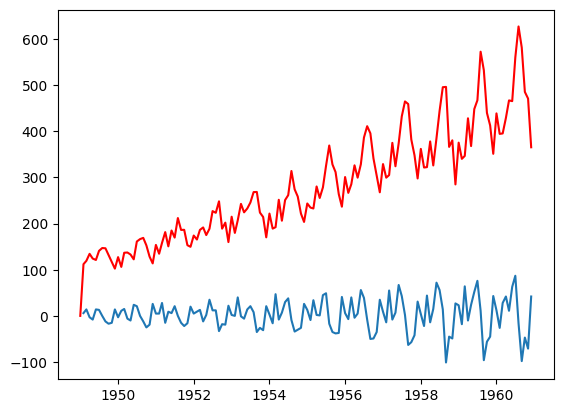

In [16]:
import statsmodels.api as smapi
model2 = smapi.tsa.arima.ARIMA(series, order=(0,1,2))

# model2=ARIMA(series,order=(0,1,2))
# results_MA=model2.fit(disp=-1)

results_MA=model2.fit()
plt.plot(data_shift)
plt.plot(results_MA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((result_MA.fittedvalues-data_shift)**2))
print('Plotting ARIMA Model')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Plotting ARIMA Model


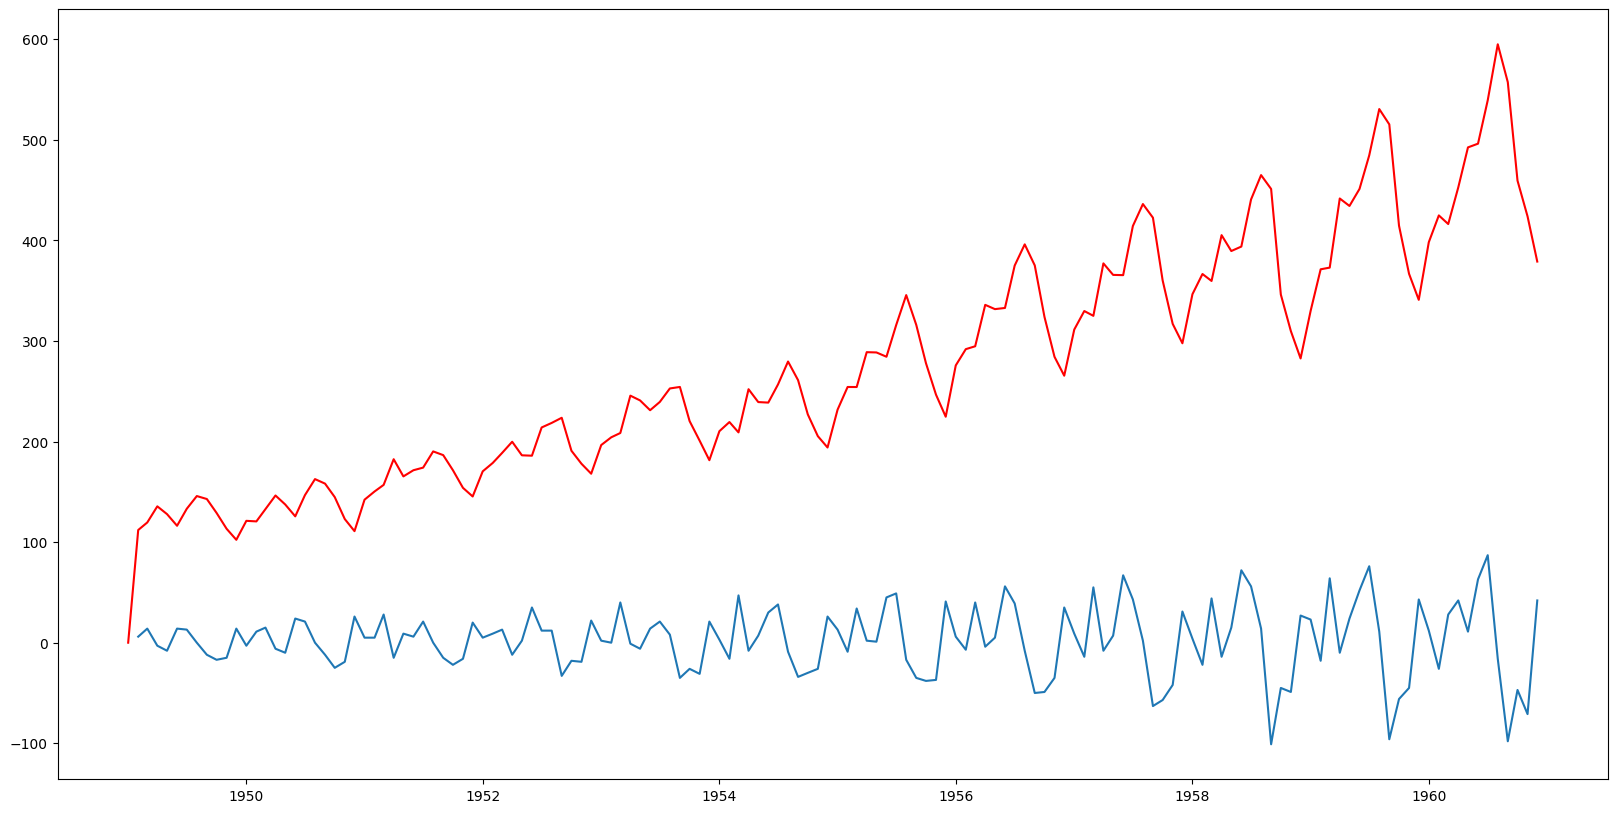

In [17]:
import statsmodels.api as smapi
plt.figure(figsize=(20,10))
model = smapi.tsa.arima.ARIMA(series, order=(2,1,2))


# model=ARIMA(series, order=(2,1,2))
results=model.fit()
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
print('Plotting ARIMA Model')

In [18]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-01-01      0.000000
1949-02-01    112.032235
1949-03-01    119.536786
1949-04-01    135.567847
1949-05-01    127.820814
dtype: float64

In [19]:
predictions_ARIMA_diff_cumsum= predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-01-01      0.000000
1949-02-01    112.032235
1949-03-01    231.569021
1949-04-01    367.136868
1949-05-01    494.957681
dtype: float64

1949-02-01    112.032235
1949-03-01    119.536786
1949-04-01    135.567847
1949-05-01    127.820814
1949-06-01    116.249530
                 ...    
1970-09-01    502.805990
1970-10-01    501.609085
1970-11-01    501.744747
1970-12-01    503.116207
1971-01-01    505.297613
Freq: MS, Name: predicted_mean, Length: 264, dtype: float64


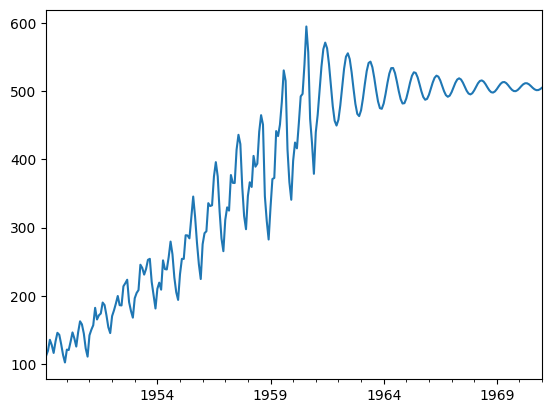

In [20]:
hasil =results.predict(1,264)
hasil.plot()
print(hasil)